In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def get_years_dfs(misinfotext_path: str, fakespeak_path: str):
    misinfotext_file = pd.ExcelFile(misinfotext_path)
    
    for sheet in misinfotext_file.sheet_names:
        df = pd.read_excel(misinfotext_file, sheet_name=sheet)
        df["year"] = sheet
        yield df
    
    fakespeak_file = pd.ExcelFile(fakespeak_path)
    
    for sheet in fakespeak_file.sheet_names:
        df = pd.read_excel(fakespeak_file, sheet_name=sheet)
        df["year"] = sheet
        yield df

In [3]:
years_dfs = list(get_years_dfs(
    misinfotext_path="./data/MisInfoText/Analysis_output/MisInfoText_liwc.xlsx",
    fakespeak_path="./data/Fakespeak-ENG/Analysis_output/Fakespeak_liwc.xlsx",
))

In [4]:
years_dfs[0].head()

,factcheckURL,Segment,WC,Analytic,Clout,Authentic,Tone,WPS,BigWords,Dic,...,filler,AllPunc,Period,Comma,QMark,Exclam,Apostro,OtherP,Emoji,year
0,http://www.politifact.com/truth-o-meter/statem...,1,255,98.12,35.57,23.38,NaN,23.18,34.12,84.31,...,0,18.82,8.24,5.88,0.00,0.0,0.00,4.71,0,2009
1,http://www.politifact.com/truth-o-meter/statem...,1,814,88.12,53.26,9.62,5.82,21.42,30.10,83.29,...,0,20.39,5.04,4.67,0.49,0.0,2.09,8.11,0,2009
2,http://www.politifact.com/truth-o-meter/statem...,1,229,74.53,13.42,57.87,1.67,20.82,23.58,87.34,...,0,11.79,4.37,6.55,0.44,0.0,0.00,0.44,0,2009
3,http://www.politifact.com/truth-o-meter/statem...,1,1021,68.28,48.79,20.67,60.23,19.26,27.91,84.52,...,0,27.33,7.05,4.11,0.39,0.0,1.86,13.91,0,2009
4,http://www.politifact.com/truth-o-meter/statem...,1,374,96.09,33.98,23.68,14.39,14.96,24.06,85.29,...,0,17.65,6.68,5.88,0.00,0.0,0.27,4.81,0,2009


Let's combine all the years to see if there is a normal distribution, because too many columns to graph individually per year

In [6]:
full_df = pd.concat(years_dfs)
full_df.head()

,factcheckURL,Segment,WC,Analytic,Clout,Authentic,Tone,WPS,BigWords,Dic,...,AllPunc,Period,Comma,QMark,Exclam,Apostro,OtherP,Emoji,year,ID
0,http://www.politifact.com/truth-o-meter/statem...,1,255,98.12,35.57,23.38,NaN,23.18,34.12,84.31,...,18.82,8.24,5.88,0.00,0.0,0.00,4.71,0.0,2009,NaN
1,http://www.politifact.com/truth-o-meter/statem...,1,814,88.12,53.26,9.62,5.82,21.42,30.10,83.29,...,20.39,5.04,4.67,0.49,0.0,2.09,8.11,0.0,2009,NaN
2,http://www.politifact.com/truth-o-meter/statem...,1,229,74.53,13.42,57.87,1.67,20.82,23.58,87.34,...,11.79,4.37,6.55,0.44,0.0,0.00,0.44,0.0,2009,NaN
3,http://www.politifact.com/truth-o-meter/statem...,1,1021,68.28,48.79,20.67,60.23,19.26,27.91,84.52,...,27.33,7.05,4.11,0.39,0.0,1.86,13.91,0.0,2009,NaN
4,http://www.politifact.com/truth-o-meter/statem...,1,374,96.09,33.98,23.68,14.39,14.96,24.06,85.29,...,17.65,6.68,5.88,0.00,0.0,0.27,4.81,0.0,2009,NaN


In [7]:
summary_cols = ["WC", "Analytic", "Clout", "Authentic", "Tone", "WPS", "BigWords", "Dic", "Linguistic"]

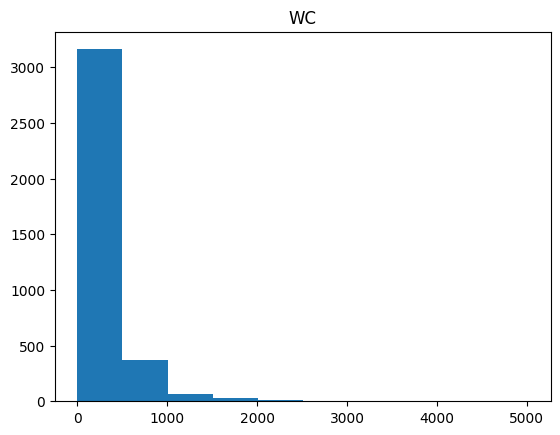

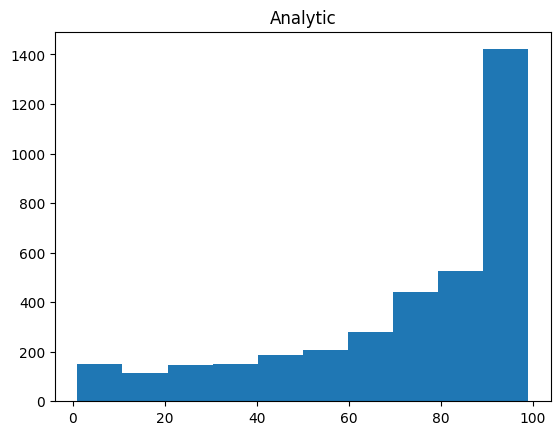

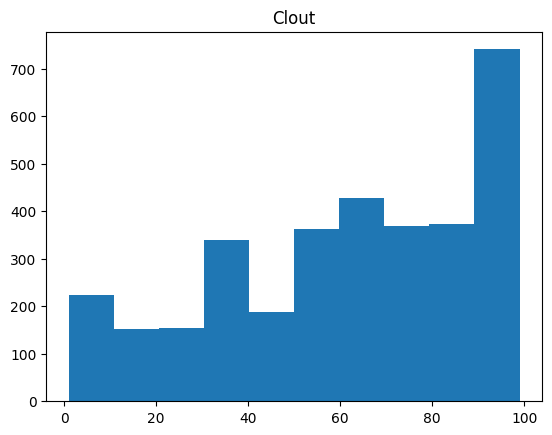

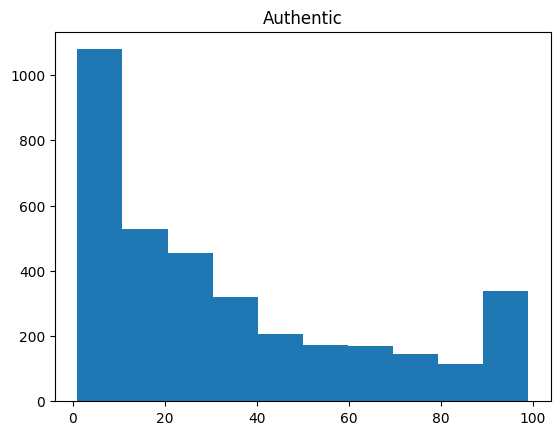

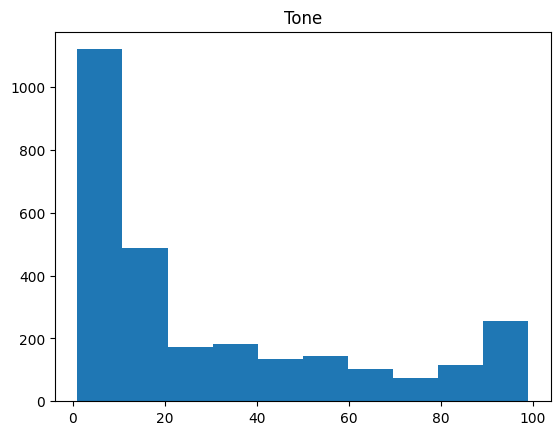

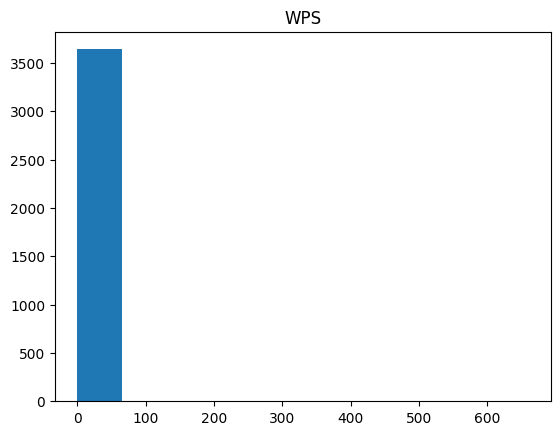

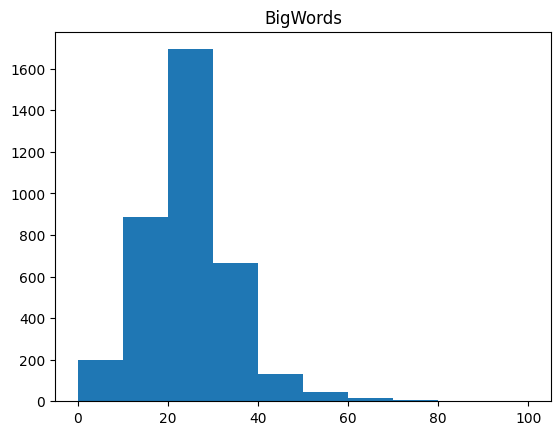

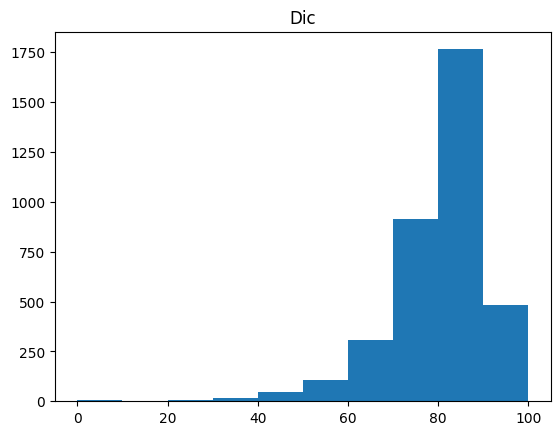

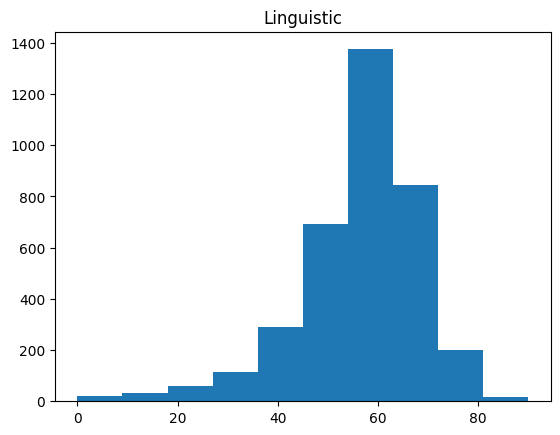

In [9]:
for col in summary_cols:
    plt.figure()
    plt.title(col)
    plt.hist(full_df[col])

BigWords, Dic, and Linguistic columns are normally distributed, the rest are not

In [10]:
from scipy.stats import kruskal, f_oneway

In [11]:
f_oneway(*[df["BigWords"] for df in years_dfs])

F_onewayResult(statistic=5.038505895636059, pvalue=5.81578161522544e-10)

In [12]:
f_oneway(*[df["Dic"] for df in years_dfs])

F_onewayResult(statistic=8.906126544574521, pvalue=1.1167200395920755e-20)

In [13]:
f_oneway(*[df["Linguistic"] for df in years_dfs])

F_onewayResult(statistic=6.214089388301289, pvalue=3.8487693238413335e-13)

There is a statistically significant change in BigWords, Dic, and Linguistic summary stats between the years

In [14]:
kruskal(*[df["WC"] for df in years_dfs])

KruskalResult(statistic=523.1412551172909, pvalue=7.151560641930592e-102)

In [21]:
kruskal(*[df["Analytic"].dropna() for df in years_dfs])

KruskalResult(statistic=55.74324803965012, pvalue=1.3388712549267573e-06)

In [23]:
kruskal(*[df["Clout"].dropna() for df in years_dfs])

KruskalResult(statistic=33.62089697685955, pvalue=0.00384807046600291)

In [26]:
kruskal(*[df["Authentic"].dropna() for df in years_dfs])

KruskalResult(statistic=15.899584387493231, pvalue=0.3887565981733448)

In [27]:
kruskal(*[df["Tone"].dropna() for df in years_dfs])

KruskalResult(statistic=38.80317436448169, pvalue=0.0006856983528262095)

In [28]:
kruskal(*[df["WPS"].dropna() for df in years_dfs])

KruskalResult(statistic=301.84242874410944, pvalue=2.314618220413296e-55)

There is a statistically significant difference in word count, Analytic, Clout, Tone, and words per sentence between the years, but not a significant change in Authentic.